In [254]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [255]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [256]:
df = pd.read_csv('../Data/action_log_features.csv')

In [460]:
temp = df['download_task_file'] + df['download_task_file'].shift(-1)
temp

0         0.0
1         3.0
2         3.0
3         1.0
4         1.0
         ... 
182882    1.0
182883    3.0
182884    3.0
182885    0.0
182886    NaN
Name: download_task_file, Length: 182887, dtype: float64

In [463]:
df[(df['download_task_file'] == 1) & (df['download_task_file'].shift(1) == 1) & (df['download_task_file'].shift(2) == 0) & (df['download_task_file'].shift(3) == 0)].head(1)


,account,at,account_access,add_account,add_action,add_contact,add_draft,add_group,add_html_template,add_role,add_snippet,add_status,add_workflow,adm_open_settings,apply_label,attach_task_file,attach_template,auth_confirm_caution,change_contact_status,change_password,change_service_user_status,clear_account_settings,clone_workflow,create_task,deactivate_workflow,download_task_file,download_task_files,download_template,edit_account,edit_account_uname,edit_action,edit_contact,edit_docx_template,edit_draft,edit_group,edit_html_template,edit_profile,edit_role,edit_snippet,edit_status,edit_workflow,edit_workflow_group,export_contacts,export_template,export_workflow,import_contacts,import_workflow,login,logout,make_available,make_unavailable,open_account,open_action,open_contact,open_docx_template,open_group,open_html_template,open_incident_log,open_new_account,open_new_action,open_new_contact,open_new_docx_template,open_new_group,open_new_html_template,open_new_role,open_new_snippet,open_new_status,open_new_workflow,open_perform_action,open_profile,open_role,open_snippet,open_status,open_task,open_workflow,open_workflow_group,perform_action,remove_account,remove_action,remove_contact,remove_draft,remove_inform,remove_role,remove_snippet,remove_status,remove_workflow,resend_token,reset_password,reset_req,set_action_state,set_new_pass,set_status_state,suspend_account,suspend_role,token_login,two_factor_email,unblock_password_reset,unsuspend_account,unsuspend_role
2562,7.0,2020-01-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [257]:
Q3_2019 = df[(df['at'] >= '2019-07-01') & (df['at'] < '2019-10-01')]
Q4_2019 = df[(df['at'] >= '2019-10-01') & (df['at'] < '2020-01-01')]
Q1_2020 = df[(df['at'] >= '2020-01-01') & (df['at'] < '2020-04-01')]
Q2_2020 = df[(df['at'] >= '2020-04-01') & (df['at'] < '2020-07-01')]
Q3_2020 = df[(df['at'] >= '2020-07-01') & (df['at'] < '2020-10-01')]
Q4_2020 = df[(df['at'] >= '2020-10-01') & (df['at'] < '2021-01-01')]
Q1_2021 = df[(df['at'] >= '2021-01-01') & (df['at'] < '2021-04-01')]
Q2_2021 = df[(df['at'] >= '2021-04-01') & (df['at'] < '2021-07-01')]

In [258]:
Q3_2019.reset_index(inplace = True, drop = True)
Q4_2019.reset_index(inplace = True, drop = True)
Q1_2020.reset_index(inplace = True, drop = True)
Q2_2020.reset_index(inplace = True, drop = True)
Q3_2020.reset_index(inplace = True, drop = True)
Q4_2020.reset_index(inplace = True, drop = True)
Q1_2021.reset_index(inplace = True, drop = True)
Q2_2021.reset_index(inplace = True, drop = True)

In [259]:
red_light = [
    'add_snippet', 'auth_confirm_caution', 'change_contact_status', 'change_password', 'change_service_user_status',
    'clear_account_settings', 'deactivate_workflow', 'download_task_file', 'download_task_files', 'download_template',
    'export_contacts', 'export_template', 'export_workflow', 'remove_account', 'remove_action',
    'remove_contact', 'remove_draft', 'remove_inform', 'remove_role', 'remove_snippet',
    'remove_status', 'remove_workflow', 'reset_password', 'set_new_pass', 'suspend_account',
    'suspend_role', 'two_factor_email'
]

yellow_light = [
    'account_access', 'add_account', 'add_action', 'add_contact', 'add_draft',
    'add_group', 'add_html_template', 'add_role', 'add_status', 'add_workflow',
    'adm_open_settings', 'edit_account', 'edit_account_uname', 'edit_action', 'edit_contact',
    'edit_docx_template', 'edit_draft', 'edit_group', 'edit_html_template', 'edit_profile',
    'edit_role', 'edit_snippet', 'edit_status', 'edit_workflow', 'edit_workflow_group',
    'resend_token', 'token_login', 'unblock_password_reset', 'unsuspend_account', 'unsuspend_role'
]

green_light = [
    'apply_label', 'attach_task_file', 'attach_template', 'clone_workflow', 'create_task',
    'create_task', 'import_contacts', 'import_workflow', 'login','logout', 'make_available',
    'make_unavailable', 'open_account', 'open_action', 'open_contact', 'open_docx_template',
    'open_group', 'open_html_template', 'open_incident_log', 'open_new_account', 'open_new_action',
    'open_new_contact', 'open_new_docx_template', 'open_new_group', 'open_new_html_template', 'open_new_role',
    'open_new_snippet', 'open_new_status', 'open_new_workflow', 'open_perform_action', 'open_profile',
    'open_role', 'open_snippet', 'open_status', 'open_task', 'open_workflow',
    'open_workflow_group', 'perform_action', 'reset_req', 'set_action_state', 'set_status_state'
]

In [7]:
# Q2_2021[Q2_2021.columns[2:]].sum()[Q2_2021[Q2_2021.columns[2:]].sum() == 0].index

In [8]:
# Q2_2021[Q2_2021.columns[2:]].sum().sort_values()

In [472]:
def outlier_detection(df, scale=1.5):
    for i in df.sum()[df.sum() < 100].index.tolist():
        sr = df[df[i] > 0][i]
        percentile25 = df[df[i] > 0][i].quantile(0.25)
#         print('25%:', percentile25)
        percentile75 = df[df[i] > 0][i].quantile(0.75)
#         print('75%:', percentile75)
        iqr = percentile75 - percentile25
#         print('iqr:', iqr)
        upper_limit = percentile75 + scale * iqr
#         print('upper limit:', upper_limit)
#         lower_limit = percentile25 - scale * iqr
#         print('lower limit:', lower_limit)
        print('upper outliers:\n\t', sr[sr > upper_limit])
#         print('lower outliers:', sr[sr < lower_limit])
        print()

In [314]:
Q3_2019_r = Q3_2019[Q3_2019.columns[2:]][red_light]
Q3_2019_r = Q3_2019_r[Q3_2019_r.columns[Q3_2019_r.sum() != 0]]
Q3_2019_r.sum()
print(Q3_2019_r.sum()[Q3_2019_r.sum() < 100])
print()
print(Q3_2019_r.sum()[(Q3_2019_r.sum() >= 100) & (Q3_2019_r.sum() < 10000)])
print()
print(Q3_2019_r.sum()[Q3_2019_r.sum() >= 10000])

change_contact_status      3.0
clear_account_settings     2.0
download_template          8.0
export_contacts           11.0
export_workflow           35.0
remove_action              8.0
remove_contact             1.0
remove_status              3.0
reset_password             2.0
suspend_role               6.0
dtype: float64

Series([], dtype: float64)

download_task_file    270506.0
remove_inform          18501.0
dtype: float64


In [471]:
outlier_detection(Q3_2019_r, 3)

upper outliers: Series([], Name: change_contact_status, dtype: float64)

upper outliers: Series([], Name: clear_account_settings, dtype: float64)

upper outliers: 35    2.0
Name: download_template, dtype: float64

upper outliers: Series([], Name: export_contacts, dtype: float64)

upper outliers: 8    21.0
Name: export_workflow, dtype: float64

upper outliers: Series([], Name: remove_action, dtype: float64)

upper outliers: Series([], Name: remove_contact, dtype: float64)

upper outliers: Series([], Name: remove_status, dtype: float64)

upper outliers: Series([], Name: reset_password, dtype: float64)

upper outliers: Series([], Name: suspend_role, dtype: float64)



[1. 1. 1.]
[]
[1. 1.]
[]
[1. 1. 2. 1. 1. 1. 1.]
[2.]
[1. 1. 1. 2. 3. 3.]
[]
[ 1.  2. 21.  2.  2.  1.  1.  1.  1.  1.  2.]
[21.]
[1. 1. 5. 1.]
[5.]
[1.]
[]
[1. 1. 1.]
[]
[2.]
[]
[1. 1. 1. 3.]
[3.]


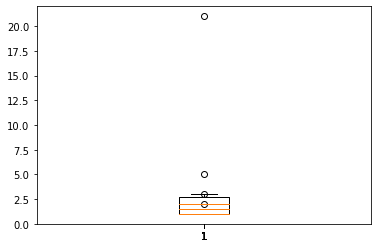

In [454]:
for i in Q3_2019_r.sum()[Q3_2019_r.sum() < 100].index.tolist():
    print(Q3_2019_r[Q3_2019_r[i] > 0][i].values)
    r = plt.boxplot(Q3_2019_r[Q3_2019_r[i] > 0][i].values)
    print(r["fliers"][0].get_data()[1])

In [300]:
# Q3_2019_r.insert(0, 'at', Q3_2019['at'])
# Q3_2019_r.insert(0, 'account', Q3_2019['account'])
# Q3_2019_r

In [373]:
Q4_2019_r = Q4_2019[Q4_2019.columns[2:]][red_light]
Q4_2019_r = Q4_2019_r[Q4_2019_r.columns[Q4_2019_r.sum() != 0]]
Q4_2019_r.sum()
print(Q4_2019_r.sum()[Q4_2019_r.sum() < 100])
print()
print(Q4_2019_r.sum()[(Q4_2019_r.sum() >= 100) & (Q4_2019_r.sum() < 10000)])
print()
print(Q4_2019_r.sum()[Q4_2019_r.sum() >= 10000])

add_snippet                   1.0
change_contact_status         5.0
change_service_user_status    2.0
export_workflow               8.0
remove_action                 1.0
remove_contact                5.0
suspend_role                  1.0
dtype: float64

Series([], dtype: float64)

download_task_file    294344.0
remove_inform          21175.0
dtype: float64


[1.]
[]
[1. 2. 1. 1.]
[2.]
[2.]
[]
[1. 3. 1. 1. 1. 1.]
[3.]
[1.]
[]
[1. 1. 1. 1. 1.]
[]
[1.]
[]


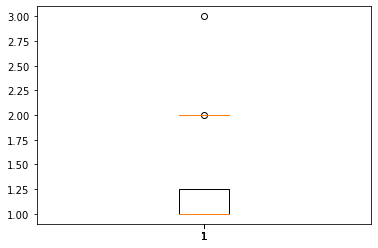

In [375]:
for i in Q4_2019_r.sum()[Q4_2019_r.sum() < 100].index.tolist():
    print(Q4_2019_r[Q4_2019_r[i] > 0][i].values)
    r = plt.boxplot(Q4_2019_r[Q4_2019_r[i] > 0][i].values)
    print(r["fliers"][0].get_data()[1])

In [299]:
# Q4_2019_r.insert(0, 'at', Q4_2019['at'])
# Q4_2019_r.insert(0, 'account', Q4_2019['account'])
# Q4_2019_r

In [312]:
Q1_2020_r = Q4_2019[Q1_2020.columns[2:]][red_light]
Q1_2020_r = Q1_2020_r[Q1_2020_r.columns[Q1_2020_r.sum() != 0]]
Q1_2020_r.sum()
print(Q1_2020_r.sum()[Q1_2020_r.sum() < 100])
print()
print(Q1_2020_r.sum()[(Q1_2020_r.sum() >= 100) & (Q1_2020_r.sum() < 10000)])
print()
print(Q1_2020_r.sum()[Q1_2020_r.sum() >= 10000])

add_snippet                   1.0
change_contact_status         5.0
change_service_user_status    2.0
export_workflow               8.0
remove_action                 1.0
remove_contact                5.0
suspend_role                  1.0
dtype: float64

Series([], dtype: float64)

download_task_file    294344.0
remove_inform          21175.0
dtype: float64


[1.]
[]
[1. 2. 1. 1.]
[2.]
[2.]
[]
[1. 3. 1. 1. 1. 1.]
[3.]
[1.]
[]
[1. 1. 1. 1. 1.]
[]
[1.]
[]


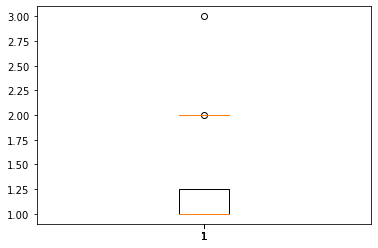

In [376]:
for i in Q1_2020_r.sum()[Q1_2020_r.sum() < 100].index.tolist():
    print(Q1_2020_r[Q1_2020_r[i] > 0][i].values)
    r = plt.boxplot(Q1_2020_r[Q1_2020_r[i] > 0][i].values)
    print(r["fliers"][0].get_data()[1])

In [298]:
# Q1_2020_r.insert(0, 'at', Q1_2020['at'])
# Q1_2020_r.insert(0, 'account', Q1_2020['account'])
# Q1_2020_r

In [311]:
Q2_2020_r = Q2_2020[Q2_2020.columns[2:]][red_light]
Q2_2020_r = Q2_2020_r[Q2_2020_r.columns[Q2_2020_r.sum() != 0]]
Q2_2020_r.sum()
print(Q2_2020_r.sum()[Q2_2020_r.sum() < 100])
print()
print(Q2_2020_r.sum()[(Q2_2020_r.sum() >= 100) & (Q2_2020_r.sum() < 10000)])
print()
print(Q2_2020_r.sum()[Q2_2020_r.sum() >= 10000])

add_snippet                2.0
change_contact_status      7.0
clear_account_settings     2.0
export_workflow            2.0
remove_action              2.0
remove_role                1.0
remove_snippet             1.0
remove_status              1.0
remove_workflow            3.0
reset_password             7.0
suspend_account            7.0
suspend_role              59.0
dtype: float64

Series([], dtype: float64)

download_task_file    378224.0
remove_inform          26867.0
dtype: float64


[1. 1.]
[]
[1. 1. 3. 1. 1.]
[3.]
[1. 1.]
[]
[1. 1.]
[]
[2.]
[]
[1.]
[]
[1.]
[]
[1.]
[]
[3.]
[]
[1. 1. 5.]
[]
[7.]
[]
[21. 38.]
[]


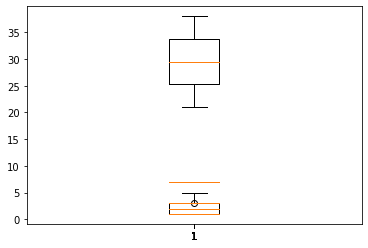

In [386]:
for i in Q2_2020_r.sum()[Q2_2020_r.sum() < 100].index.tolist():
    print(Q2_2020_r[Q2_2020_r[i] > 0][i].values)
    r = plt.boxplot(Q2_2020_r[Q2_2020_r[i] > 0][i].values)
    print(r["fliers"][0].get_data()[1])

In [297]:
# Q2_2020_r.insert(0, 'at', Q2_2020['at'])
# Q2_2020_r.insert(0, 'account', Q2_2020['account'])
# Q2_2020_r

In [309]:
Q3_2020_r = Q3_2020[Q3_2020.columns[2:]][red_light]
Q3_2020_r = Q3_2020_r[Q3_2020_r.columns[Q3_2020_r.sum() != 0]]
Q3_2020_r.sum()
print(Q3_2020_r.sum()[Q3_2020_r.sum() < 100])
print()
print(Q3_2020_r.sum()[(Q3_2020_r.sum() >= 100) & (Q3_2020_r.sum() < 10000)])
print()
print(Q3_2020_r.sum()[Q3_2020_r.sum() >= 10000])

change_contact_status      5.0
change_password            1.0
clear_account_settings     2.0
export_workflow            5.0
remove_contact             1.0
reset_password             3.0
suspend_account            2.0
suspend_role              27.0
dtype: float64

download_task_files    3096.0
dtype: float64

download_task_file    393284.0
remove_inform          27266.0
dtype: float64


[1. 2. 1. 1.]
[2.]
[1.]
[]
[1. 1.]
[]
[1. 1. 3.]
[]
[1.]
[]
[1. 2.]
[]
[1. 1.]
[]
[ 1.  9.  1.  1. 13.  1.  1.]
[13.]


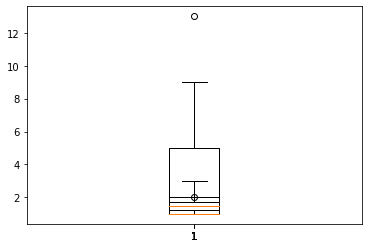

In [435]:
for i in Q3_2020_r.sum()[Q3_2020_r.sum() < 100].index.tolist():
    print(Q3_2020_r[Q3_2020_r[i] > 0][i].values)
    r = plt.boxplot(Q3_2020_r[Q3_2020_r[i] > 0][i].values)
    print(r["fliers"][0].get_data()[1])

In [296]:
# Q3_2020_r.insert(0, 'at', Q3_2020['at'])
# Q3_2020_r.insert(0, 'account', Q3_2020['account'])
# Q3_2020_r

In [307]:
Q4_2020_r = Q4_2020[Q4_2020.columns[2:]][red_light]
Q4_2020_r = Q4_2020_r[Q4_2020_r.columns[Q4_2020_r.sum() != 0]]
Q4_2020_r.sum()
print(Q4_2020_r.sum()[Q4_2020_r.sum() < 100])
print()
print(Q4_2020_r.sum()[(Q4_2020_r.sum() >= 100) & (Q4_2020_r.sum() < 10000)])
print()
print(Q4_2020_r.sum()[Q4_2020_r.sum() >= 10000])

add_snippet                1.0
change_password           18.0
clear_account_settings    22.0
export_workflow            1.0
remove_account             3.0
remove_action              1.0
remove_draft               9.0
reset_password             4.0
set_new_pass              50.0
suspend_account            1.0
suspend_role               9.0
two_factor_email           2.0
dtype: float64

download_task_files    5764.0
dtype: float64

auth_confirm_caution     50263.0
download_task_file      319131.0
remove_inform            24378.0
dtype: float64


[1.]
[]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[]
[1. 1. 2. 1. 1. 3. 1. 1. 2. 3. 3. 3.]
[]
[1.]
[]
[3.]
[]
[1.]
[]
[1. 1. 1. 1. 4. 1.]
[4.]
[1. 2. 1.]
[]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[]
[1.]
[]
[9.]
[]
[2.]
[]


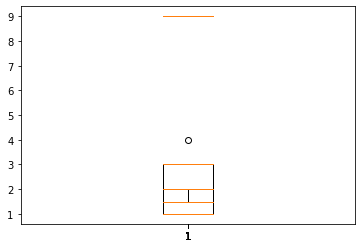

In [444]:
for i in Q4_2020_r.sum()[Q4_2020_r.sum() < 100].index.tolist():
    print(Q4_2020_r[Q4_2020_r[i] > 0][i].values)
    r = plt.boxplot(Q4_2020_r[Q4_2020_r[i] > 0][i].values)
    print(r["fliers"][0].get_data()[1])

In [295]:
# Q4_2020_r.insert(0, 'at', Q4_2020['at'])
# Q4_2020_r.insert(0, 'account', Q4_2020['account'])
# Q4_2020_r

In [306]:
Q1_2021_r = Q1_2021[Q1_2021.columns[2:]][red_light]
Q1_2021_r = Q1_2021_r[Q1_2021_r.columns[Q1_2021_r.sum() != 0]]
Q1_2021_r.sum()
print(Q1_2021_r.sum()[Q1_2021_r.sum() < 100])
print()
print(Q1_2021_r.sum()[(Q1_2021_r.sum() >= 100) & (Q1_2021_r.sum() < 10000)])
print()
print(Q1_2021_r.sum()[Q1_2021_r.sum() >= 10000])

add_snippet                1.0
change_password           21.0
clear_account_settings    17.0
export_workflow            1.0
remove_draft               3.0
remove_role                1.0
reset_password             3.0
set_new_pass              56.0
dtype: float64

download_task_files    5633.0
dtype: float64

auth_confirm_caution     45083.0
download_task_file      351612.0
remove_inform            23091.0
dtype: float64


[1.]
[]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[]
[3. 1. 1. 5. 3. 1. 1. 2.]
[]
[1.]
[]
[2. 1.]
[]
[1.]
[]
[2. 1.]
[]
[1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1.]
[2.]


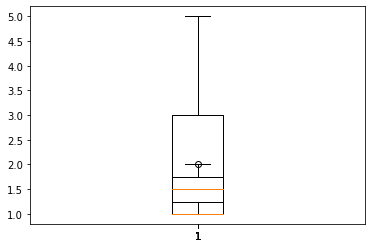

In [446]:
for i in Q1_2021_r.sum()[Q1_2021_r.sum() < 100].index.tolist():
    print(Q1_2021_r[Q1_2021_r[i] > 0][i].values)
    r = plt.boxplot(Q1_2021_r[Q1_2021_r[i] > 0][i].values)
    print(r["fliers"][0].get_data()[1])

In [294]:
# Q1_2021_r.insert(0, 'at', Q1_2021['at'])
# Q1_2021_r.insert(0, 'account', Q1_2021['account'])
# Q1_2021_r

In [305]:
Q2_2021_r = Q2_2021[Q2_2021.columns[2:]][red_light]
Q2_2021_r = Q2_2021_r[Q2_2021_r.columns[Q2_2021_r.sum() != 0]]
Q2_2021_r.sum()
print(Q2_2021_r.sum()[Q2_2021_r.sum() < 100])
print()
print(Q2_2021_r.sum()[(Q2_2021_r.sum() >= 100) & (Q2_2021_r.sum() < 10000)])
print()
print(Q2_2021_r.sum()[Q2_2021_r.sum() >= 10000])

change_password           17.0
clear_account_settings    30.0
export_template            2.0
export_workflow            1.0
remove_account             7.0
remove_action              1.0
remove_draft               6.0
suspend_account            4.0
dtype: float64

download_task_files    4618.0
set_new_pass            160.0
suspend_role            167.0
dtype: float64

auth_confirm_caution     28542.0
download_task_file      277571.0
remove_inform            20844.0
dtype: float64


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[]
[1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1.]
[2. 2. 2. 2. 2. 2.]
[2.]
[]
[1.]
[]
[1. 1. 1. 4.]
[4.]
[1.]
[]
[1. 1. 4.]
[]
[1. 1. 1. 1.]
[]


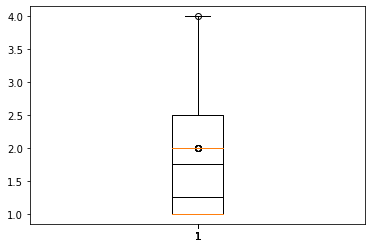

In [447]:
for i in Q2_2021_r.sum()[Q2_2021_r.sum() < 100].index.tolist():
    print(Q2_2021_r[Q2_2021_r[i] > 0][i].values)
    r = plt.boxplot(Q2_2021_r[Q2_2021_r[i] > 0][i].values)
    print(r["fliers"][0].get_data()[1])

In [301]:
# Q2_2021_r.insert(0, 'at', Q2_2021['at'])
# Q2_2021_r.insert(0, 'account', Q2_2021['account'])
# Q2_2021_r

In [202]:
quarters = [Q3_2019_r, Q4_2019_r, Q1_2020_r, Q2_2020_r, Q2_2020_r, Q3_2020_r, Q4_2020_r, Q1_2021_r, Q2_2021_r]

In [205]:
common_aims = []
for qrt in quarters:
    common_aims.extend(qrt.index.tolist())
common_aims = set(common_aims)
common_aims

{'add_snippet',
 'auth_confirm_caution',
 'change_contact_status',
 'change_password',
 'change_service_user_status',
 'clear_account_settings',
 'download_task_file',
 'download_task_files',
 'download_template',
 'export_contacts',
 'export_template',
 'export_workflow',
 'remove_account',
 'remove_action',
 'remove_contact',
 'remove_draft',
 'remove_inform',
 'remove_role',
 'remove_snippet',
 'remove_status',
 'remove_workflow',
 'reset_password',
 'set_new_pass',
 'suspend_account',
 'suspend_role',
 'two_factor_email'}

In [253]:
fig = go.Figure(go.Line(x=red_light, y=np.array(Q3_2019_r.sum()).astype(int), name='Q3_2019'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q4_2019_r.sum()).astype(int), name='Q4_2019'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q1_2020_r.sum()).astype(int), name='Q1_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q2_2020_r.sum()).astype(int), name='Q2_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q3_2020_r.sum()).astype(int), name='Q3_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q4_2020_r.sum()).astype(int), name='Q4_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q1_2021_r.sum()).astype(int), name='Q1_2021'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q2_2021_r.sum()).astype(int), name='Q2_2021'))
fig.show()

C:\Users\Naira\AppData\Local\Temp/ipykernel_6248/602105804.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [37]:
fig = go.Figure(go.Line(x=red_light, y=np.array(Q3_2019[red_light].sum()).astype(int), name='Q3_2019'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q4_2019[red_light].sum()).astype(int), name='Q4_2019'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q1_2020[red_light].sum()).astype(int), name='Q1_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q2_2020[red_light].sum()).astype(int), name='Q2_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q3_2020[red_light].sum()).astype(int), name='Q3_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q4_2020[red_light].sum()).astype(int), name='Q4_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q1_2021[red_light].sum()).astype(int), name='Q1_2021'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q2_2021[red_light].sum()).astype(int), name='Q2_2021'))
fig.show()

In [35]:
fig = go.Figure(go.Line(x=red_light, y=np.array(Q3_2019[red_light].max()).astype(int), name='Q3_2019'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q4_2019[red_light].max()).astype(int), name='Q4_2019'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q1_2020[red_light].max()).astype(int), name='Q1_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q2_2020[red_light].max()).astype(int), name='Q2_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q3_2020[red_light].max()).astype(int), name='Q3_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q4_2020[red_light].max()).astype(int), name='Q4_2020'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q1_2021[red_light].max()).astype(int), name='Q1_2021'))
fig.add_trace(go.Line(x=red_light, y=np.array(Q2_2021[red_light].max()).astype(int), name='Q2_2021'))
fig.show()

In [40]:
fig = go.Figure(go.Line(x=yellow_light, y=np.array(Q3_2019[yellow_light].sum()).astype(int), name='Q3_2019'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q4_2019[yellow_light].sum()).astype(int), name='Q4_2019'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q1_2020[yellow_light].sum()).astype(int), name='Q1_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q2_2020[yellow_light].sum()).astype(int), name='Q2_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q3_2020[yellow_light].sum()).astype(int), name='Q3_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q4_2020[yellow_light].sum()).astype(int), name='Q4_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q1_2021[yellow_light].sum()).astype(int), name='Q1_2021'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q2_2021[yellow_light].sum()).astype(int), name='Q2_2021'))
fig.show()

In [41]:
fig = go.Figure(go.Line(x=yellow_light, y=np.array(Q3_2019[yellow_light].sum()).astype(int), name='Q3_2019'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q4_2019[yellow_light].sum()).astype(int), name='Q4_2019'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q1_2020[yellow_light].sum()).astype(int), name='Q1_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q2_2020[yellow_light].sum()).astype(int), name='Q2_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q3_2020[yellow_light].sum()).astype(int), name='Q3_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q4_2020[yellow_light].sum()).astype(int), name='Q4_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q1_2021[yellow_light].sum()).astype(int), name='Q1_2021'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q2_2021[yellow_light].sum()).astype(int), name='Q2_2021'))
fig.show()

In [18]:
fig = go.Figure(go.Line(x=yellow_light, y=np.array(Q3_2019[yellow_light].max()).astype(int), name='Q3_2019'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q4_2019[yellow_light].max()).astype(int), name='Q4_2019'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q1_2020[yellow_light].max()).astype(int), name='Q1_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q2_2020[yellow_light].max()).astype(int), name='Q2_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q3_2020[yellow_light].max()).astype(int), name='Q3_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q4_2020[yellow_light].max()).astype(int), name='Q4_2020'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q1_2021[yellow_light].max()).astype(int), name='Q1_2021'))
fig.add_trace(go.Line(x=yellow_light, y=np.array(Q2_2021[yellow_light].max()).astype(int), name='Q2_2021'))
fig.show()

In [19]:
fig = go.Figure(go.Line(x=green_light, y=np.array(Q3_2019[green_light].sum()).astype(int), name='Q3_2019'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q4_2019[green_light].sum()).astype(int), name='Q4_2019'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q1_2020[green_light].sum()).astype(int), name='Q1_2020'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q2_2020[green_light].sum()).astype(int), name='Q2_2020'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q3_2020[green_light].sum()).astype(int), name='Q3_2020'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q4_2020[green_light].sum()).astype(int), name='Q4_2020'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q1_2021[green_light].sum()).astype(int), name='Q1_2021'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q2_2021[green_light].sum()).astype(int), name='Q2_2021'))
fig.show()

In [20]:
fig = go.Figure(go.Line(x=green_light, y=np.array(Q3_2019[green_light].max()).astype(int), name='Q3_2019'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q4_2019[green_light].max()).astype(int), name='Q4_2019'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q1_2020[green_light].max()).astype(int), name='Q1_2020'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q2_2020[green_light].max()).astype(int), name='Q2_2020'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q3_2020[green_light].max()).astype(int), name='Q3_2020'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q4_2020[green_light].max()).astype(int), name='Q4_2020'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q1_2021[green_light].max()).astype(int), name='Q1_2021'))
fig.add_trace(go.Line(x=green_light, y=np.array(Q2_2021[green_light].max()).astype(int), name='Q2_2021'))
fig.show()

In [333]:
Q4_2020_features = Q4_2020[Q4_2020[['download_task_files', 'auth_confirm_caution', 'remove_inform']].sum(1) != 0].reset_index(drop = True)

In [334]:
users = list(map(lambda i: i[0] + ' ' + str(i[1]), zip(Q3_2019_features['at'].tolist(), Q3_2019_features['account'].tolist())))

In [27]:
# users

In [335]:
Q4_2020_features = Q4_2020_features[['download_task_files', 'auth_confirm_caution', 'remove_inform']]

change_contact_status      3.0
clear_account_settings     2.0
download_template          8.0
export_contacts           11.0
export_workflow           35.0
remove_action              8.0
remove_contact             1.0
remove_status              3.0
reset_password             2.0
suspend_role               6.0
dtype: float64

In [336]:
x = Q3_2019_features.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [337]:
pca = PCA(n_components = 2)
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [338]:
# calculate the distance from each point to its closest neighbor
nn = NearestNeighbors(n_neighbors = 2)

# fit the nearest neighbor
nbrs = nn.fit(reduced)

# returns two arrays - distance to the closest n_neighbors points and index for each point
distances, indices = nbrs.kneighbors(reduced)
print(distances.shape)

# sort the distance and plot it
distances = np.sort(distances, axis=0)
distances = distances[:,1]
px.line(distances)

(31, 2)


In [339]:
# train the model using DBSCAN
db = DBSCAN(eps=0.03, min_samples=15)

# prediction for dbscan clusters
db_clusters = db.fit_predict(reduced)

In [340]:
list(set(db_clusters))

[0, -1]

In [341]:
reduced['cluster'] = db_clusters
reduced['user'] = users
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()

,x,y,cluster,name
0,-0.390443,-0.413049,-1,2019-07-01 2.0
1,0.732010,0.271605,-1,2019-07-04 2.0
2,0.042619,-0.009238,0,2019-07-07 2.0
3,-0.133107,0.212813,-1,2019-07-10 2.0
4,0.026289,-0.430433,0,2019-07-11 2.0


In [342]:
px.scatter(reduced, x='x', y='y', color="cluster",
           color_continuous_scale=px.colors.diverging.Portland)

In [343]:
reduced[(reduced['cluster'] == -1)]

,x,y,cluster,name
0,-0.390443,-0.413049,-1,2019-07-01 2.0
1,0.732010,0.271605,-1,2019-07-04 2.0
3,-0.133107,0.212813,-1,2019-07-10 2.0
6,-0.420531,-0.658959,-1,2019-08-07 2.0
9,-0.016791,-0.517749,-1,2019-08-16 2.0
14,-0.565787,-0.199343,-1,2019-09-06 2.0
24,0.732010,0.271605,-1,2019-07-12 402.0
25,-0.133107,0.212813,-1,2019-07-17 402.0
26,0.732010,0.271605,-1,2019-09-05 402.0
27,-0.308068,0.418175,-1,2019-07-25 407.0


In [344]:
test = Q4_2020[Q4_2020[['download_task_files', 'auth_confirm_caution', 'remove_inform']].sum(1) != 0].reset_index(drop = True)
test = test[['at', 'account', 'download_task_files', 'auth_confirm_caution', 'remove_inform']]

In [345]:
px.line(test[test['account'] == 361], x='at', y=test.columns.tolist()[2:])